In [5]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import pickle

In [97]:
processed_data_path=os.path.join(os.pardir,'data//intrim//Insurance_Producers_Licensed_in_Iowa_10.csv')

In [98]:
processed_data1=pd.read_csv(processed_data_path,index_col='National Producer Number')

c:\users\671869\documents\case_study\agent_attiration\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [99]:
drop_cols=['Last Name','First Name','Mailing Address 1','Mailing Address 2',
               'Mailing Address 3','Business Phone','Business Email','Mailing Zip',
               'Active Date','Date Expire','Mailing City','Physical Location']

processed_data1.drop(drop_cols,axis=1,inplace=True)

In [100]:
processed_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132853 entries, 1 to 132853
Data columns (total 19 columns):
Gender                             132853 non-null object
Age                                132853 non-null int64
Salary                             132853 non-null float64
LOS                                130230 non-null float64
Marital StatSs                     132853 non-null object
Mailing State                      132853 non-null object
Iowa Resident                      132853 non-null object
Crop                               132853 non-null object
Surety                             132853 non-null object
Accident and Health                132853 non-null object
Life                               132853 non-null object
Variable Life, Variable Annuity    132853 non-null object
Personal Lines                     132853 non-null object
Credit                             132853 non-null object
Excess and Surplus Lines           132853 non-null object
Property          

In [101]:
processed_data1['LOS'].mean()
processed_data1.LOS.fillna(13.24, inplace=True)

In [102]:
processed_data1.to_csv('train_processed_10Percent.csv')

In [103]:
processed_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132853 entries, 1 to 132853
Data columns (total 19 columns):
Gender                             132853 non-null object
Age                                132853 non-null int64
Salary                             132853 non-null float64
LOS                                132853 non-null float64
Marital StatSs                     132853 non-null object
Mailing State                      132853 non-null object
Iowa Resident                      132853 non-null object
Crop                               132853 non-null object
Surety                             132853 non-null object
Accident and Health                132853 non-null object
Life                               132853 non-null object
Variable Life, Variable Annuity    132853 non-null object
Personal Lines                     132853 non-null object
Credit                             132853 non-null object
Excess and Surplus Lines           132853 non-null object
Property          

In [104]:
X=processed_data1.iloc[:,:18]
X.head()

,Gender,Age,Salary,LOS,Marital StatSs,Mailing State,Iowa Resident,Crop,Surety,Accident and Health,Life,"Variable Life, Variable Annuity",Personal Lines,Credit,Excess and Surplus Lines,Property,Casualty,Reciprocal Authority
National Producer Number,,,,,,,,,,,,,,,,,,
1,M,22,905.08,1.0,S,MN,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No
2,M,36,54537.50,14.0,M,CA,No,No,No,No,No,No,No,No,No,Yes,Yes,No
3,M,36,14669.59,13.0,S,IL,No,No,No,No,Yes,No,No,No,No,Yes,Yes,No
4,M,21,91096.89,1.0,S,NC,No,No,No,No,Yes,Yes,No,No,No,No,No,No
5,F,42,97931.30,20.0,M,IA,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No


In [105]:
#seperate dependent and independent variables
X=processed_data1.iloc[:,:18].values
y=processed_data1.iloc[:,18]

In [106]:
#change categorical variables to label using label encoder
X_label1=LabelEncoder()
X[:,0]=X_label1.fit_transform(X[:,0])
X_label2=LabelEncoder()
X[:,4]=X_label2.fit_transform(X[:,4])
X_label3=LabelEncoder()
X[:,6]=X_label3.fit_transform(X[:,6])
X_label4=LabelEncoder()
X[:,7]=X_label4.fit_transform(X[:,7])
X_label5=LabelEncoder()
X[:,8]=X_label5.fit_transform(X[:,8])
X_label6=LabelEncoder()
X[:,9]=X_label6.fit_transform(X[:,9])
X_label7=LabelEncoder()
X[:,10]=X_label7.fit_transform(X[:,10])
X_label8=LabelEncoder()
X[:,11]=X_label8.fit_transform(X[:,11])
X_label9=LabelEncoder()
X[:,12]=X_label9.fit_transform(X[:,12])
X_label10=LabelEncoder()
X[:,13]=X_label10.fit_transform(X[:,13])
X_label11=LabelEncoder()
X[:,14]=X_label11.fit_transform(X[:,14])
X_label12=LabelEncoder()
X[:,15]=X_label12.fit_transform(X[:,15])
X_label12=LabelEncoder()
X[:,16]=X_label12.fit_transform(X[:,16])
X_label12=LabelEncoder()
X[:,17]=X_label12.fit_transform(X[:,17])

In [107]:
#check for state column
X[:,5]

array(['MN', 'CA', 'IL', ..., 'WA', 'IA', 'TX'], dtype=object)

In [108]:
#convert state column to labels
X_label=LabelEncoder()
X[:,5]=X_label.fit_transform(X[:,5])

In [109]:
#check classes of state column
X_label.classes_

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'ON', 'OR', 'PA', 'PR', 'RI', 'SC',
       'SD', 'SK', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY'], dtype=object)

In [110]:
#check labels after label encoding
X[:,5]

array([24, 4, 15, ..., 52, 13, 47], dtype=object)

In [111]:
#Save the label encoder for state to use on test data

#create the file paths
label_file_path=os.path.join(os.path.pardir,'models','agent_predictor_label_encoder.pkl')

#open the files to write
label_file_pickle=open(label_file_path,'wb')

#write in file
pickle.dump(X_label,label_file_pickle)

#close the file
label_file_pickle.close()

In [112]:
#use one hot encoder on state column as it has more than 2 unique values
one_hot=OneHotEncoder(categorical_features=[5],sparse=False)
X=one_hot.fit_transform(X)

c:\users\671869\documents\case_study\agent_attiration\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\671869\documents\case_study\agent_attiration\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [114]:
#check shape of dependent variables
X.shape

(132853, 73)

In [115]:

#converting array to dataframe to check if onehot encoder has worked or not
test_df=pd.DataFrame(data=X[:,:])
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
#Save the onehot encoder for state to use on test data

#create the file paths
onehot_file_path=os.path.join(os.path.pardir,'models','agent_predictor_onehot_encoder.pkl')

#open the files to write
onehot_file_pickle=open(onehot_file_path,'wb')

#write in file
pickle.dump(one_hot,onehot_file_pickle)

#close the file
onehot_file_pickle.close()

In [59]:
#check value of dependent variable
y.values

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
#split data in train and validation set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [61]:
#Scaling of data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)#
X_test=sc.fit_transform(X_test)

In [62]:
X_train

array([[-0.01852084, -0.05196463, -0.06467186, ..., -0.75461929,
        -0.75538386, -0.02065723],
       [-0.01852084, -0.05196463, -0.06467186, ...,  1.32517152,
         1.32383025, -0.02065723],
       [-0.01852084, -0.05196463, -0.06467186, ...,  1.32517152,
         1.32383025, -0.02065723],
       ...,
       [-0.01852084, -0.05196463, -0.06467186, ..., -0.75461929,
        -0.75538386, -0.02065723],
       [-0.01852084, -0.05196463, -0.06467186, ..., -0.75461929,
        -0.75538386, -0.02065723],
       [-0.01852084, -0.05196463, -0.06467186, ..., -0.75461929,
        -0.75538386, -0.02065723]])

In [63]:
#Save scalar to apply scaling on test data

#create the file paths
scale_file_path=os.path.join(os.path.pardir,'models','agent_predictor_standardscalar_encoder.pkl')

#open the files to write
scale_file_pickle=open(scale_file_path,'wb')

#write in file
pickle.dump(sc,scale_file_pickle)

#close the file
scale_file_pickle.close()

In [64]:
#to be used to check if standard scalar is working or not
df2=pd.DataFrame(data=X_train[:,:])
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-0.018521,-0.051965,-0.064672,4.730302,-0.191367,-0.17667,-0.089966,-0.0279,-0.024885,-0.320835,...,-0.047485,-1.056624,-0.994903,-0.445505,1.942259,-0.156515,-0.068413,-0.754619,-0.755384,-0.020657
1,-0.018521,-0.051965,-0.064672,-0.211403,-0.191367,-0.17667,-0.089966,-0.0279,-0.024885,-0.320835,...,-0.047485,-1.056624,-0.994903,-0.445505,-0.514864,-0.156515,-0.068413,1.325172,1.323830,-0.020657
2,-0.018521,-0.051965,-0.064672,-0.211403,5.225570,-0.17667,-0.089966,-0.0279,-0.024885,-0.320835,...,-0.047485,0.946410,1.005123,-0.445505,-0.514864,-0.156515,-0.068413,1.325172,1.323830,-0.020657
3,-0.018521,-0.051965,-0.064672,-0.211403,-0.191367,-0.17667,-0.089966,-0.0279,-0.024885,-0.320835,...,-0.047485,0.946410,1.005123,-0.445505,-0.514864,-0.156515,-0.068413,-0.754619,-0.755384,-0.020657
4,-0.018521,-0.051965,-0.064672,-0.211403,-0.191367,-0.17667,-0.089966,-0.0279,-0.024885,-0.320835,...,-0.047485,0.946410,1.005123,-0.445505,-0.514864,-0.156515,-0.068413,-0.754619,-0.755384,-0.020657


In [65]:
#import LogisticRegression Algorithm
classifier=LogisticRegression(C=1)
classifier.fit(X_train,y_train)
classifier.

c:\users\671869\documents\case_study\agent_attiration\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Feature ranking:
1. feature 58 (0.599672)
2. feature 57 (0.156388)
3. feature 59 (0.147147)
4. feature 56 (0.012719)
5. feature 60 (0.008662)
6. feature 64 (0.007602)
7. feature 65 (0.007498)
8. feature 66 (0.007324)
9. feature 67 (0.004684)
10. feature 70 (0.002863)
11. feature 71 (0.002798)
12. feature 62 (0.001921)
13. feature 61 (0.001774)
14. feature 47 (0.001746)
15. feature 9 (0.001680)
16. feature 30 (0.001565)
17. feature 3 (0.001531)
18. feature 68 (0.001492)
19. feature 25 (0.001461)
20. feature 24 (0.001407)
21. feature 36 (0.001337)
22. feature 35 (0.001317)
23. feature 28 (0.001172)
24. feature 4 (0.001107)
25. feature 13 (0.001103)
26. feature 44 (0.001059)
27. feature 5 (0.001051)
28. feature 40 (0.001048)
29. feature 46 (0.001028)
30. feature 69 (0.000995)
31. feature 15 (0.000934)
32. feature 17 (0.000930)
33. feature 32 (0.000919)
34. feature 48 (0.000892)
35. feature 53 (0.000864)
36. feature 16 (0.000856)
37. feature 49 (0.000853)
38. feature 52 (0.000715)
39. feat

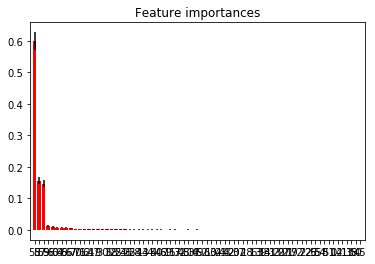

In [81]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [66]:
#Predict value for X_test
y_pred_logistic=classifier.predict(X_test)

In [67]:
#check coff of logistic regression
classifier.coef_

array([[ 3.56605845e-03,  2.63514245e-03, -1.21541406e-02,
        -2.76906393e-03,  9.02576415e-03,  9.94773294e-03,
         5.27137187e-03,  3.97421981e-03, -1.35785914e-02,
         6.47577925e-03, -4.78929846e-03,  2.89806053e-02,
         1.64535689e-02, -5.70594817e-03,  1.05139766e-02,
        -1.35205664e-02,  9.71888388e-04, -6.77225953e-03,
        -1.56370469e-02,  1.57672270e-02, -8.36053613e-03,
         1.66177949e-02, -4.18043471e-03,  1.45636731e-02,
         2.97499476e-03, -2.81290776e-03, -1.00788378e-02,
         2.25606817e-03,  9.19171869e-04, -1.75886949e-03,
        -5.34579384e-05, -5.83279097e-03,  2.78125208e-04,
         3.52694592e-03,  4.17679231e-03,  6.17782150e-04,
        -2.56152061e-03,  1.10956497e-03, -1.74213834e-02,
        -1.15122170e-02, -8.25157650e-03,  7.63252406e-03,
         1.47247348e-03,  4.70387299e-03,  2.35391667e-03,
        -1.59283739e-02,  1.68605527e-03, -2.18012700e-03,
        -3.62876111e-04, -2.90660708e-03, -2.97379657e-0

In [68]:
#check the accuracy and confusion matrix
conf_met=confusion_matrix(y_test,y_pred_logistic)
acc_logistic=accuracy_score(y_test,y_pred_logistic)
print(acc_logistic)
print(conf_met)

0.84683125094084
[[10731     5]
 [ 2030   520]]


In [77]:
#Import randomforest algo
rand_classifier=RandomForestClassifier(n_estimators=10 ,random_state=0)
rand_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [78]:
#check the accuracy and confusion matrix
y_pred_rand=rand_classifier.predict(X_test)
conf_met_rand=confusion_matrix(y_test,y_pred_rand)
acc_rand=accuracy_score(y_test,y_pred_rand)
print(acc_rand)
print(conf_met_rand)

0.901174168297456
[[10633   103]
 [ 1210  1340]]


In [71]:
class_tree=DecisionTreeClassifier(random_state=0)
class_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [72]:
#check the accuracy and confusion matrix
y_pred_tree=class_tree.predict(X_test)
conf_met_tree=confusion_matrix(y_test,y_pred_tree)
acc_tree=accuracy_score(y_test,y_pred_tree)
print(acc_tree)
print(conf_met_tree)

0.8227457474032817
[[9460 1276]
 [1079 1471]]


In [73]:
#Import Naivebayes algo
class_naive=DecisionTreeClassifier(random_state=0)
class_naive.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [74]:
#check the accuracy and confusion matrix
y_pred_naive=class_naive.predict(X_test)
conf_met_naive=confusion_matrix(y_test,y_pred_naive)
acc_naive=accuracy_score(y_test,y_pred_naive)
print(acc_naive)
print(conf_met_naive)

0.8227457474032817
[[9460 1276]
 [1079 1471]]


In [75]:
#Import XGB
class_xgboost=XGBClassifier(random_state=0)
class_xgboost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [76]:

#check the accuracy and confusion matrix
y_pred_xgboost=class_naive.predict(X_test)
conf_met_xgboost=confusion_matrix(y_test,y_pred_xgboost)
acc_xgboost=accuracy_score(y_test,y_pred_xgboost)
print(acc_xgboost)
print(conf_met_xgboost)

0.8227457474032817
[[9460 1276]
 [1079 1471]]


## Creating Pickle File for model

In [37]:
#import pickle library

#create the file paths
model_file_path=os.path.join(os.path.pardir,'models','agent_predictor_model_xgboost.pkl')

#open the files to write
model_file_pickle=open(model_file_path,'wb')

#write in file
pickle.dump(class_xgboost,model_file_pickle)

#close the file
model_file_pickle.close()

In [116]:
import os
import pickle
#create the file paths
model_file_path=os.path.join(os.path.pardir,'models','agent_predictor_model_xgboost.pkl')

#open files in read mode
model_file_pickle=open(model_file_path,'rb')

#load files
agent_predictor_model=pickle.load(model_file_pickle)

#close the file
model_file_pickle.close()

In [117]:
#check the model
agent_predictor_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=nan, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


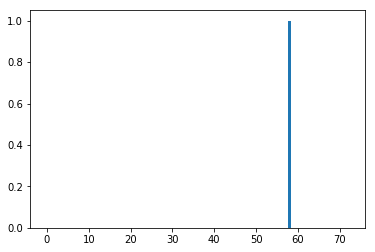

In [118]:
%matplotlib inline
# plot feature importance manually
from numpy import loadtxt

from matplotlib import pyplot

# feature importance
print(agent_predictor_model.feature_importances_)
# plot
pyplot.bar(range(len(agent_predictor_model.feature_importances_)), agent_predictor_model.feature_importances_)
pyplot.show()

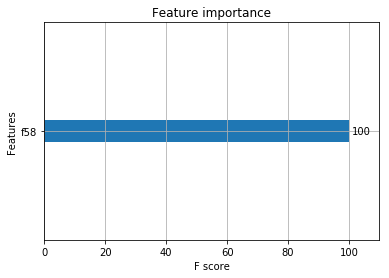

In [119]:
from numpy import loadtxt

from xgboost import plot_importance
from matplotlib import pyplot
# load data


# plot feature importance
plot_importance(agent_predictor_model)
pyplot.show()